## HW-1 • Math 189 • Sp 2024
### Due Date: Fri, Apr 19

> NAME: $\color{red}{\text{    Chang Shu     }}$
> 
> PID: $\color{red}{\text{    A16846972     }}$
>
> 

---

## Instructions
* Submit your solutions online on Gradescope
* Look at the detailed instructions [here](https://canvas.ucsd.edu/courses/55191/pages/expectations)


I certify that the following write-up is my own work, and have abided by the UCSD Academic Integrity Guidelines.

- [x] Yes
- [ ] No

---

# Question 1

For this question you will use the class data from HW-0 to generate insights

The dataset `student_data_189.csv` is available on Github [here](https://github.com/ucsd-math189/sp24/) or on Canvas in the Files tab. 

<br></br>

a. Read the dataset as a dataframe (`pandas` in Python, `tibble` in R, or `DataFrame` in Julia) and print the first 5 rows.

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('data/189_student_data.csv')
df.head(5)

,data_sharing?,fluency,189_excitement,seat_comfort,ucsd_year,ucsd_major,credits,hr_reading,hr_activity,hr_online,year_3
0,Yes,Python,Slightly excited,Pretty good,3,Data Science,20.0,2.0,2.0,6.0,1
1,Yes,R,Very excited,Meh,3,Social Sciences,20.0,0.0,0.0,2.0,1
2,Yes,Other,Slightly excited,Meh,3,Physical Sciences,16.0,0.0,1.0,4.0,1
3,Yes,Python,Very excited,Meh,3,Social Sciences,20.0,2.0,2.0,4.0,1
4,Yes,MATLAB,Slightly excited,Awful,3,Engineering,17.0,1.0,1.0,3.0,1


---

b. Print the number of variables and the number of observations in the dataset.

In [2]:
df.shape

(206, 11)

---

c. For each variable, mention if the variable is:
* Categorical
* Ordinal
* Discrete quantitative, or
* Continuous quantitative 

In [3]:
df.columns

Index(['data_sharing?', 'fluency', '189_excitement', 'seat_comfort',
       'ucsd_year', 'ucsd_major', 'credits', 'hr_reading', 'hr_activity',
       'hr_online', 'year_3'],
      dtype='object')

data_sharing: categorical \
fluency: categorical\
189_excitement: ordinal\
seat_comfort: ordinal\
ucsd_year: discrete quantitative\
ucsd_major: categorical\
credits: discrete quantitative\
hr_reading: continuous quantitative\
hr_activity: continuous quantitative\
hr_online: continuous quantitative\
year_3: discrete quantitative

---

d. create a boxplot of the number of hours spent online `hr_online` by `ucsd_year`. Do you see any differences?

<AxesSubplot:title={'center':'hr_online'}, xlabel='ucsd_year'>

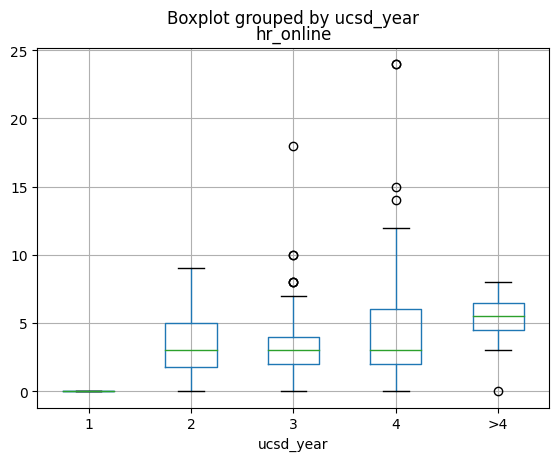

In [4]:
df.boxplot(column='hr_online', by='ucsd_year')

I observed that people spend more and more time online as they get older.

---

e. create a scatterplot of the number of hours people spend reading vs. the number of hours online. Do you see any patterns?

<AxesSubplot:xlabel='hr_online', ylabel='hr_reading'>

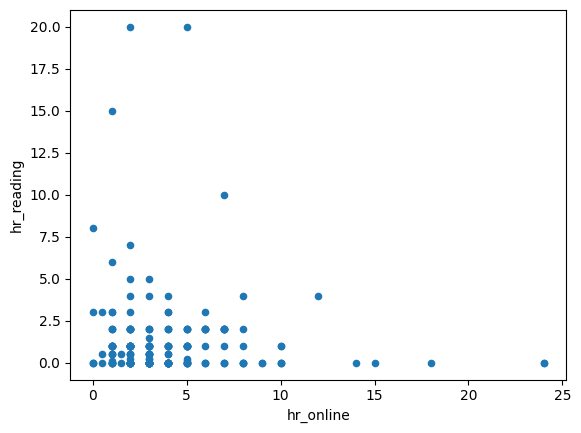

In [5]:
df.plot.scatter(x='hr_online', y='hr_reading')

The plot does not show a clear correlation between the hours spent online and the hours spent reading. But we can see a slightly inverse relationship between hr_reading and hr_online, which is people who spend more time online will spend less time reading.

---

f. create a bar chart for the overall comfort in the classroom's seating

<AxesSubplot:>

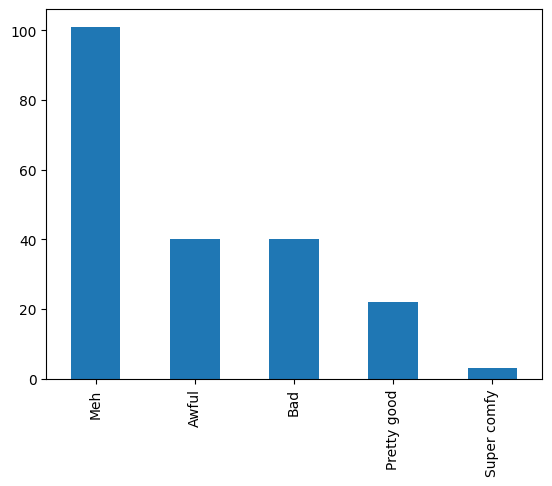

In [6]:
df['seat_comfort'].value_counts().plot(kind='bar')

---

g. For each `ucsd_major` create a table calculating the percentage of people within the major who are fluent in each programming language (`fluency`). 

In [7]:
total_counts = df.groupby('ucsd_major')['fluency'].count()
fluency_counts = df.groupby(['ucsd_major', 'fluency']).size().unstack(fill_value=0)
percentage_fluent = (fluency_counts.T / total_counts).T * 100
percentage_fluent

fluency,MATLAB,Other,Python,R
ucsd_major,,,,
Arts & Humanities,0.000000,0.000000,100.000000,0.000000
Biological Sciences,33.333333,0.000000,66.666667,0.000000
Data Science,2.222222,4.444444,93.333333,0.000000
Engineering,6.060606,12.121212,78.787879,3.030303
Health Sciences,0.000000,0.000000,100.000000,0.000000
Physical Sciences,0.000000,14.000000,78.000000,8.000000
Social Sciences,4.000000,4.000000,88.000000,4.000000


---
---
---

# Question 2

a. Create a $20,000 \times 7$ matrix $A$ which contains random observations from a normal distribution with mean 0 and standard deviation 1.

In [8]:
A = np.random.normal(0, 1, (20000, 7))
A

array([[ 0.18492384, -0.35113483, -0.02207026, ...,  1.07831022,
         0.11240351,  1.61855917],
       [-0.83632292, -0.13459463, -1.24594035, ..., -0.08434812,
        -1.00818472,  1.25883539],
       [ 0.38512734,  0.34436918,  0.096387  , ..., -1.39726342,
        -0.01949785, -0.19861316],
       ...,
       [-0.9030747 , -0.73798444,  0.24201369, ...,  0.42749936,
        -1.74394601, -0.07964921],
       [ 0.50779736, -1.48687906,  0.13717442, ...,  0.39402898,
         0.0368    ,  0.28567807],
       [ 0.01749379,  0.54510241,  0.85128805, ...,  1.31816909,
         0.16306503, -0.51403377]])

---

b. Compute the largest eigenvalue of $A^\top A$.

In [9]:
eigenvalues = np.linalg.eigvals(A.T @ A)
eigenvalues.max() 

20689.033081257625

---

c. Create a vector $u$ which contains $n=20,000$ random observations from a normal distribution with mean 0 and standard deviation 1.  Plot the historgram of the observations of $u$ with the $Y$-axis to show the **_normalized frequency_** of each bin.

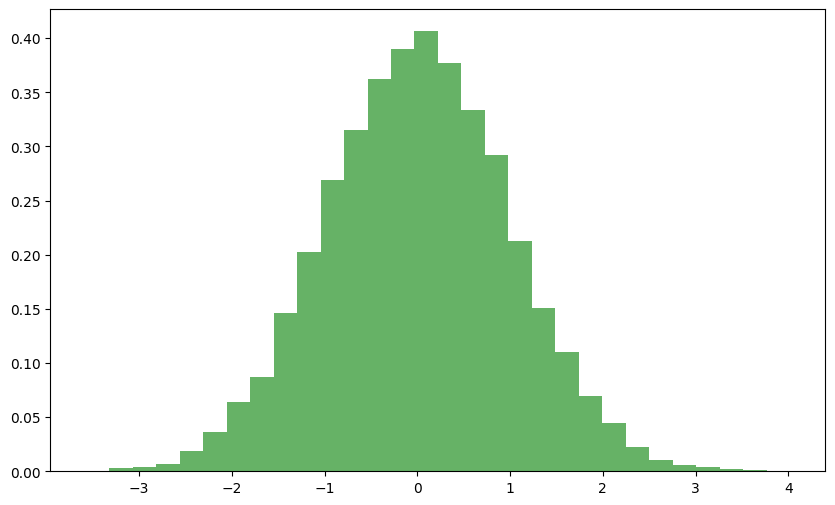

In [10]:
import matplotlib.pyplot as plt
from scipy.stats import norm

u = np.random.normal(0, 1, 20000)

plt.figure(figsize=(10, 6))
plt.hist(u, bins=30, density=True, alpha=0.6, color='g')
plt.show()

---

d. How does the histogram from part c. compare to the PDF of the standard normal distribution $N(0, 1)$?

The histogram from part c closely matches the bell-shaped curve of the PDF of the standard normal distribution $N(0,1)$. As the number of observations increases, the histogram should more closely approximate the true PDF due to the law of large numbers.

---

e. Let $v$ be the vector obtained by squaring the entries of $A$ and then calculating the mean for each row. (This should result in a vector of length $20,000$.) Plot the histogram of $v$ with the $Y$-axis to show the **_normalized frequency_** of each bin.

<AxesSubplot:>

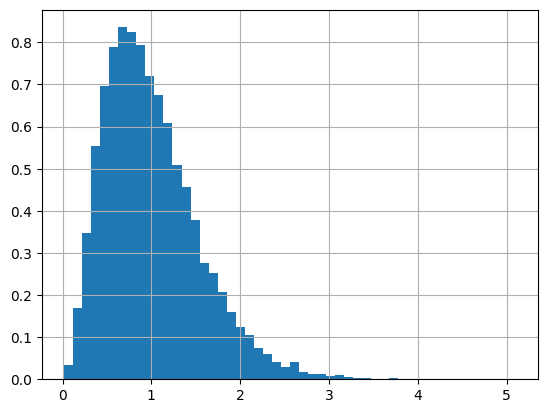

In [11]:
v = np.mean(A**2, axis=1)
pd.Series(v).hist(bins=50, density=True)

---

f. What do you expect the histogram of $v$ to look like?

The histogram is a little bit right skewed instead of the normal distribution.

---

g. Let $w = u \oslash \sqrt{v}$ be the **element-wise division** of $u$ by the square root of $v$. Plot the histogram of $w$ with the $Y$-axis to show the **_normalized frequency_** of each bin.

(array([5.24181488e-04, 4.36817907e-04, 1.22309014e-03, 1.39781730e-03,
        3.31981609e-03, 1.08330841e-02, 2.64711651e-02, 6.12418705e-02,
        1.36811368e-01, 2.58596201e-01, 3.60200046e-01, 3.71120493e-01,
        2.67856740e-01, 1.36112460e-01, 6.34259600e-02, 2.61217108e-02,
        1.18814471e-02, 5.50390562e-03, 1.65990804e-03, 9.60999394e-04,
        5.24181488e-04, 6.11545069e-04, 8.73635813e-05, 8.73635813e-05,
        8.73635813e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        8.73635813e-05, 8.73635813e-05]),
 array([-6.29872880e+00, -5.72640794e+00, -5.15408708e+00, -4.58176622e+00,
        -4.00944536e+00, -3.43712450e+00, -2.86480364e+00, -2.29248278e+00,
        -1.72016192e+00, -1.14784106e+00, -5.75520198e-01, -3.19933759e-03,
         5.69121523e-01,  1.14144238e+00,  1.71376324e+00,  2.28608410e+00,
         2.85840496e+00,  3.43072582e+00,  4.00304668e+00,  4.57536754e+00,
         5.14768840e+00,  5.72000926e+00,  6.29233012e+00,  6.86465098e+00

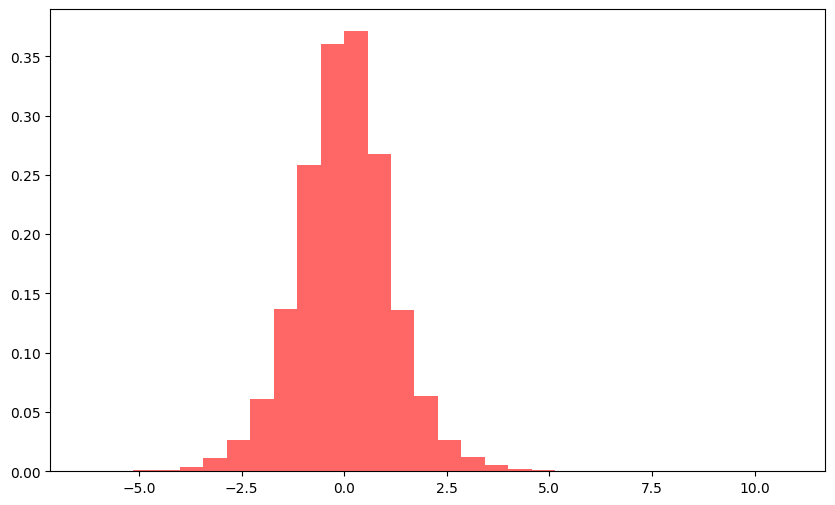

In [12]:
w = u / np.sqrt(v)
plt.figure(figsize=(10, 6))
plt.hist(w, bins=30, density=True, alpha=0.6, color='r')

---

h. Is the histrogram of $w$ supposed to approximate the PDF of the standard normal distribution $N(0, 1)$? Why or why not? Overlay the PDF of the standard normal distribution on the histogram of $w$ to support your answer.

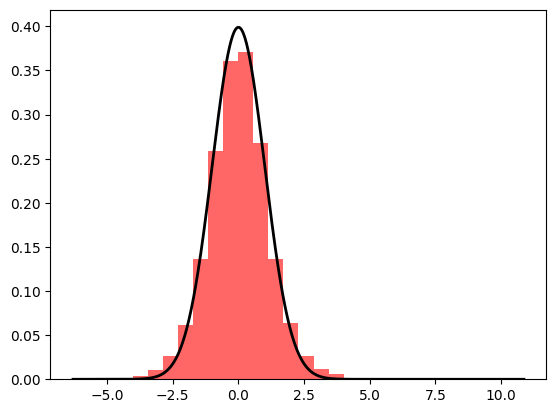

In [13]:
x_norm = np.linspace(min(w), max(w), 1000)
p_norm = norm.pdf(x_norm)
plt.hist(w, bins=30, density=True, alpha=0.6, color='r')
# Plot the standard normal PDF
plt.plot(x_norm, p_norm, 'k', linewidth=2)

The histogram of $w$ is supposed to approximate the PDF of a standard normal distribution due to the Central Limit Theorem.



---

i. Plot the **empirical cumulative distribution** functions (ECDFs) of $u$ and $w$ in the same plot. What do you observe?

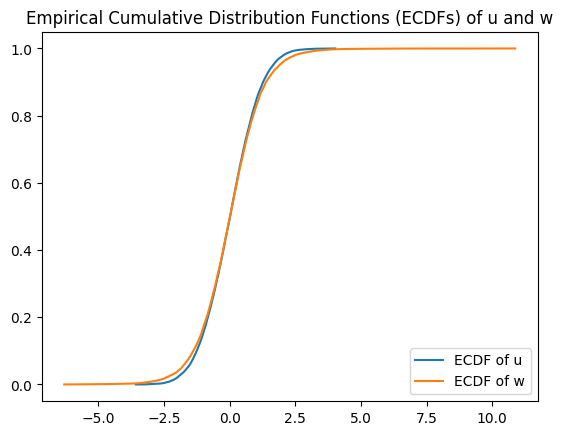

In [18]:
import scipy.stats as stats
u_sorted = np.sort(u)
u_final = np.arange(1, len(u) + 1) / len(u)
w_sorted = np.sort(w)
w_final = np.arange(1, len(w) + 1) / len(w)
plt.plot(u_sorted, u_final, label='ECDF of u')
plt.plot(w_sorted, w_final, label='ECDF of w')

plt.title('Empirical Cumulative Distribution Functions (ECDFs) of u and w')
plt.legend(loc='lower right')
plt.show()

From the plot we can tell that the curve shapes are quite similar from each other.

---

j. Compute the **empirical quantiles** of $u$ and $w$ for $\alpha = 0.025$ and $\alpha=0.975$. How do these quantiles compare to the **theoretical quantiles** $z_\alpha$ of the standard normal distribution $N(0, 1)$?

In [19]:
# For u
quantile_u_low = np.quantile(u, 0.025)
quantile_u_high = np.quantile(u, 0.975)

# For w
quantile_w_low = np.quantile(w, 0.025)
quantile_w_high = np.quantile(w, 0.975)

theoretical_quantile_low = norm.ppf(0.025)
theoretical_quantile_high = norm.ppf(0.975)
print(f"Empirical 2.5% quantile of u: {quantile_u_low}")
print(f"Empirical 97.5% quantile of u: {quantile_u_high}")
print(f"Empirical 2.5% quantile of w: {quantile_w_low}")
print(f"Empirical 97.5% quantile of w: {quantile_w_high}")
print(f"Theoretical 2.5% quantile of N(0,1): {theoretical_quantile_low}")
print(f"Theoretical 97.5% quantile of N(0,1): {theoretical_quantile_high}")

Empirical 2.5% quantile of u: -1.935234776021877
Empirical 97.5% quantile of u: 1.9619482906025274
Empirical 2.5% quantile of w: -2.3001785999752222
Empirical 97.5% quantile of w: 2.3497951734107176
Theoretical 2.5% quantile of N(0,1): -1.9599639845400545
Theoretical 97.5% quantile of N(0,1): 1.959963984540054


The empirical quantiles for $u$ closely match the theoretical quantiles of a standard normal distribution than that of $w$. That because $u$ is drawn from such a distribution. For $w$, there's a slightly greater deviation from the normal distribution, with the empirical 2.5% and 97.5% quantiles being more extreme.

---